<a href="https://colab.research.google.com/github/chernoskutov1989dv/LLMmetrics/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9C%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B0_BERT_Score_Chernoskutov_Dmitry_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gigachain -q
!pip install sentence-transformers -q
!pip install faiss-cpu -q
!pip install gigachain_community -q
!pip install gigachain-core -q
!pip install pypdf -q
!pip install nltk -q
!pip install rouge-score -q
!pip install transformers datasets -q
!pip install torchmetrics -q
!pip install evaluate -q
!pip install sacrebleu -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 615.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.7/403.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently t

In [ ]:
import pandas as pd

In [ ]:
from torchmetrics.functional.text.bert import bert_score


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
questions_df = pd.read_excel("q_data2.xlsx").Question
answers_df = pd.read_excel("q_data2.xlsx").Answer
llm_answers_df = pd.read_excel("answers_ready2.xlsx").Answer

In [ ]:
llm_answers = []
for e in llm_answers_df:
  llm_answers.append(e)

answers = []
for e in answers_df:
  answers.append(e)

questions = []
for e in questions_df:
  questions.append(e)

In [ ]:
preds = llm_answers
target = answers
df_BERTScore = pd.DataFrame(columns=['Answer', 'LLM_Answer', 'Precision', 'Recall', 'F1'])
b_score = bert_score(preds=preds , target=target, model_name_or_path="deepvk/USER-bge-m3")
for e in range(len(llm_answers)):
  new_row = {'Answer': answers[e], 'LLM_Answer': llm_answers[e], 'Precision': b_score['precision'][e], 'Recall': b_score['recall'][e], 'F1': b_score['f1'][e]}
  df_BERTScore = pd.concat([df_BERTScore, pd.DataFrame([new_row])], ignore_index=True)
df_BERTScore

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.33M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.44G [00:00<?, ?B/s]

,Answer,LLM_Answer,Precision,Recall,F1
0,В качестве причин недоступности веб-интерфейса...,Веб-интерфейс сервера может не загружаться по ...,tensor(0.7582),tensor(0.7472),tensor(0.7527)
1,Причина:\nОтсутствие переменных SIEM_SYSLOG_HO...,Контейнер itm_m_siem_connector может перезапус...,tensor(0.5733),tensor(0.6296),tensor(0.6001)
2,"Причина\n\nЗначение vm.overcommit_memory=0, из...","Ошибка ""WARNING overcommit_memory"" обычно возн...",tensor(0.6951),tensor(0.7258),tensor(0.7101)
3,Причина\n\nУстаревшая версия docker.,Причина данной проблемы заключается в устаревш...,tensor(0.5775),tensor(0.5898),tensor(0.5836)
4,В качестве причин недоступности веб-интерфейса...,"Пользователь, у вас возникла проблема с доступ...",tensor(0.6252),tensor(0.6663),tensor(0.6451)
5,Причина: Если не передано новое значение перем...,Имя Docker контейнера в виде случайного набора...,tensor(0.6648),tensor(0.6470),tensor(0.6558)
6,Для этого необходимо выполнить следующие дейст...,Для изменения адреса подсети контейнеров необх...,tensor(0.6093),tensor(0.6440),tensor(0.6261)
7,В качестве причин конфликта подсети контейнеро...,Конфликт адресов подсети контейнеров может быт...,tensor(0.6145),tensor(0.6356),tensor(0.6249)
8,Причина\n\nСтраница в веб-интерфейсе была акти...,"Ошибка ""Сервер недоступен"" может быть вызвана ...",tensor(0.6704),tensor(0.6761),tensor(0.6732)
9,Причина\n\nУказанный в тексте ошибки TCP или U...,"Ошибка вида ""Cannot start service ..."" может п...",tensor(0.6898),tensor(0.7309),tensor(0.7097)


In [ ]:
df_BERTScore.head(10)

,Answer,LLM_Answer,Precision,Recall,F1
0,В качестве причин недоступности веб-интерфейса...,Веб-интерфейс сервера может не загружаться по ...,tensor(0.7582),tensor(0.7472),tensor(0.7527)
1,Причина:\nОтсутствие переменных SIEM_SYSLOG_HO...,Контейнер itm_m_siem_connector может перезапус...,tensor(0.5733),tensor(0.6296),tensor(0.6001)
2,"Причина\n\nЗначение vm.overcommit_memory=0, из...","Ошибка ""WARNING overcommit_memory"" обычно возн...",tensor(0.6951),tensor(0.7258),tensor(0.7101)
3,Причина\n\nУстаревшая версия docker.,Причина данной проблемы заключается в устаревш...,tensor(0.5775),tensor(0.5898),tensor(0.5836)
4,В качестве причин недоступности веб-интерфейса...,"Пользователь, у вас возникла проблема с доступ...",tensor(0.6252),tensor(0.6663),tensor(0.6451)
5,Причина: Если не передано новое значение перем...,Имя Docker контейнера в виде случайного набора...,tensor(0.6648),tensor(0.6470),tensor(0.6558)
6,Для этого необходимо выполнить следующие дейст...,Для изменения адреса подсети контейнеров необх...,tensor(0.6093),tensor(0.6440),tensor(0.6261)
7,В качестве причин конфликта подсети контейнеро...,Конфликт адресов подсети контейнеров может быт...,tensor(0.6145),tensor(0.6356),tensor(0.6249)
8,Причина\n\nСтраница в веб-интерфейсе была акти...,"Ошибка ""Сервер недоступен"" может быть вызвана ...",tensor(0.6704),tensor(0.6761),tensor(0.6732)
9,Причина\n\nУказанный в тексте ошибки TCP или U...,"Ошибка вида ""Cannot start service ..."" может п...",tensor(0.6898),tensor(0.7309),tensor(0.7097)


In [ ]:
df_BERTScore.tail(15)

,Answer,LLM_Answer,Precision,Recall,F1
35,Отредактируйте конфигурационный файл для настр...,Для настройки SSH необходимо выполнить следующ...,tensor(0.7864),tensor(0.8035),tensor(0.7949)
36,Количество пре-форков экземпляров zabbix_agent...,Команда zbx_startagents_info отвечает за колич...,tensor(0.9004),tensor(0.9068),tensor(0.9036)
37,Отличительными особенностями ПК UDV ITM являют...,Преимущества ПК DATAPK ITM заключаются в следу...,tensor(0.6245),tensor(0.6467),tensor(0.6354)
38,На вкладке «LLD макросы» можно указать пользов...,"Вкладка ""LLD макросы"" предназначена для настро...",tensor(0.6704),tensor(0.6479),tensor(0.6589)
39,Штатные способы аутентификации: Внутренняя; ...,Безопасными способами аутентификации являются ...,tensor(0.6526),tensor(0.6333),tensor(0.6428)
40,ПК UDV ITM предназначен для эксплуатации в кр...,"Да, UDV ITM предназначен для эксплуатации в кр...",tensor(0.4994),tensor(0.5149),tensor(0.5070)
41,В отличии от режима «без сбора данных» в ...,Обслуживание узлов сети со сбором данных отлич...,tensor(0.6342),tensor(0.6733),tensor(0.6532)
42,Временная метка — набор символо...,"Временная метка — это набор символов, показыва...",tensor(0.6980),tensor(0.7005),tensor(0.6992)
43,На примере файла “Руководство администратора” ...,"Для удаления файла из дистрибутива, где вам не...",tensor(0.5253),tensor(0.5699),tensor(0.5467)
44,Для этой ОС настройка происходит с помощью про...,Для настройки ОМ на Windows 10 необходимо выпо...,tensor(0.6663),tensor(0.6700),tensor(0.6681)


In [ ]:
df_BERTScore[20:30]

,Answer,LLM_Answer,Precision,Recall,F1
20,За просмотр полного списка объектов мониторинга,Команда ОМ отвечает за мониторинг объектов мон...,tensor(0.6848),tensor(0.6860),tensor(0.6854)
21,Главное меню веб-интерфейса сервера визуализац...,Главное меню веб-интерфейса содержит следующие...,tensor(0.8126),tensor(0.8236),tensor(0.8181)
22,Причина\n\nПроблемы с подключением к порту 10050.,Ошибка Get value from agent failed: cannot con...,tensor(0.7165),tensor(0.6981),tensor(0.7072)
23,iptables -D INPUT 5 где INPUT – это имя цепо...,Команда для удаления правила при настройке меж...,tensor(0.6883),tensor(0.7469),tensor(0.7164)
24,Перейти на вкладку «Настройка» →\n ...,Для импорта данных об объекте мониторинга из ф...,tensor(0.7199),tensor(0.6813),tensor(0.7001)
25,Войти в интерфейс DATAPK ITM-K с помощью интер...,Для проверки визуализации данных необходимо вы...,tensor(0.7277),tensor(0.6993),tensor(0.7132)
26,"Все интерфейсы, доступные роли «Пользов...","Роли ""Администратор"" доступны следующие интерф...",tensor(0.6511),tensor(0.6556),tensor(0.6533)
27,Переменная представляет собой список загружаем...,Переменная ZBX_LOADMODULE используется для ука...,tensor(0.6269),tensor(0.6732),tensor(0.6492)
28,Задает уровень журналирования:\n ...,Переменная ZBX_DEBUGLEVEL задает уровень журна...,tensor(0.7077),tensor(0.7084),tensor(0.7081)
29,В списке отображаются следующие типы событий:\...,В журнале событий можно увидеть различные типы...,tensor(0.6091),tensor(0.5977),tensor(0.6033)


Text(0.5, 1.0, 'График Precision, Recall, F1 по количеству вопросов')

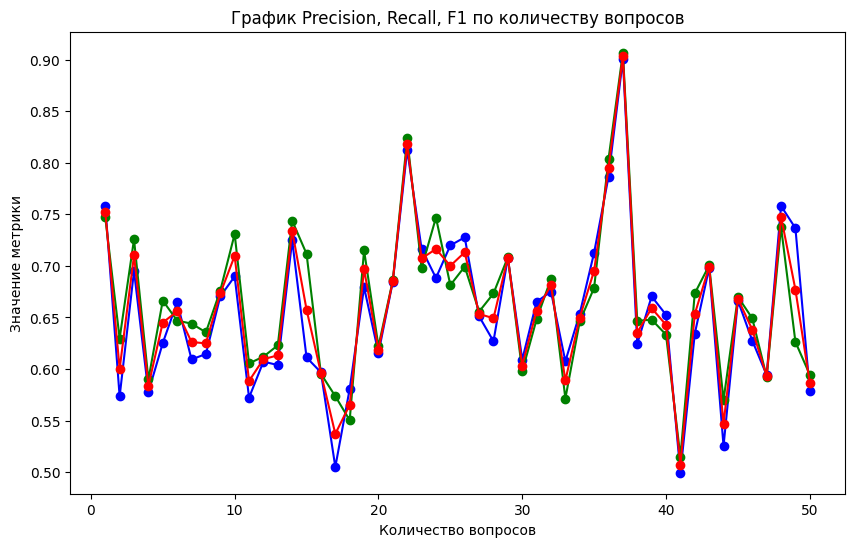

In [ ]:
# Построение графиков для Precision, Recall, F1 относительно количества вопросов
plt.figure(figsize=(10, 6))

# Нумерация вопросов по оси X
x = range(1, len(llm_answers) + 1)

# График Precision
plt.plot(x, df_BERTScore['Precision'], label='Precision', color='blue', marker='o')

# График Recall
plt.plot(x, df_BERTScore['Recall'], label='Recall', color='green', marker='o')

# График F1
plt.plot(x, df_BERTScore['F1'], label='F1', color='red', marker='o')

# Добавляем подписи к осям и заголовок
plt.xlabel('Количество вопросов')
plt.ylabel('Значение метрики')
plt.title('График Precision, Recall, F1 по количеству вопросов')

Пояснение по коду

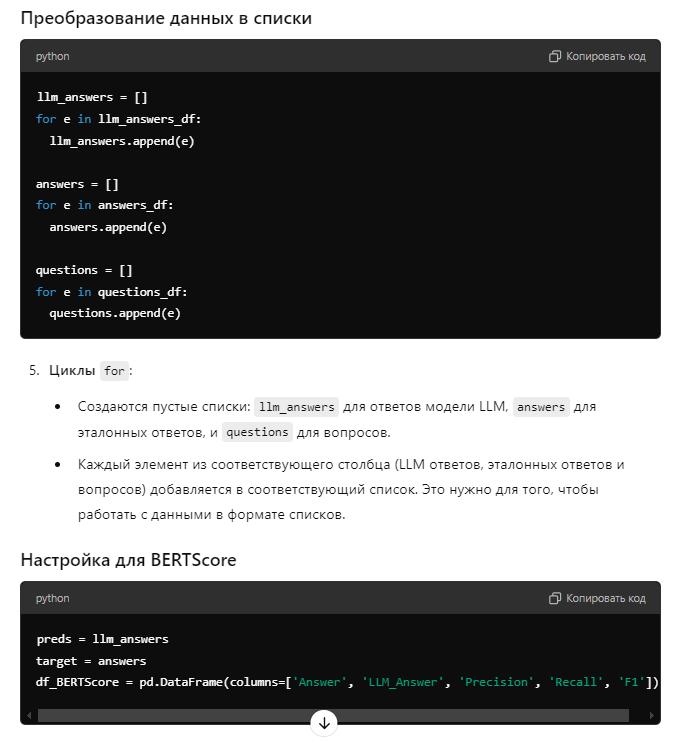

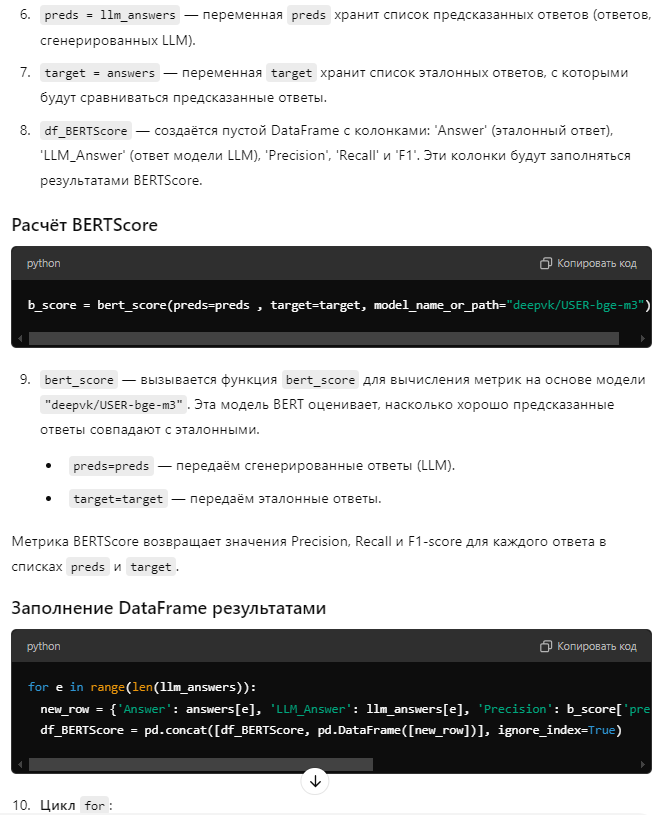

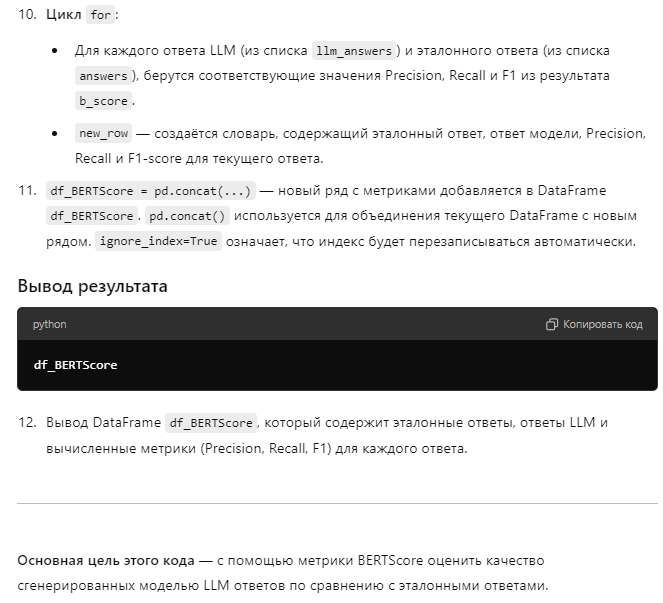

Литература: https://arxiv.org/pdf/1904.09675

https://www.youtube.com/watch?v=g_GI5HCBbxA

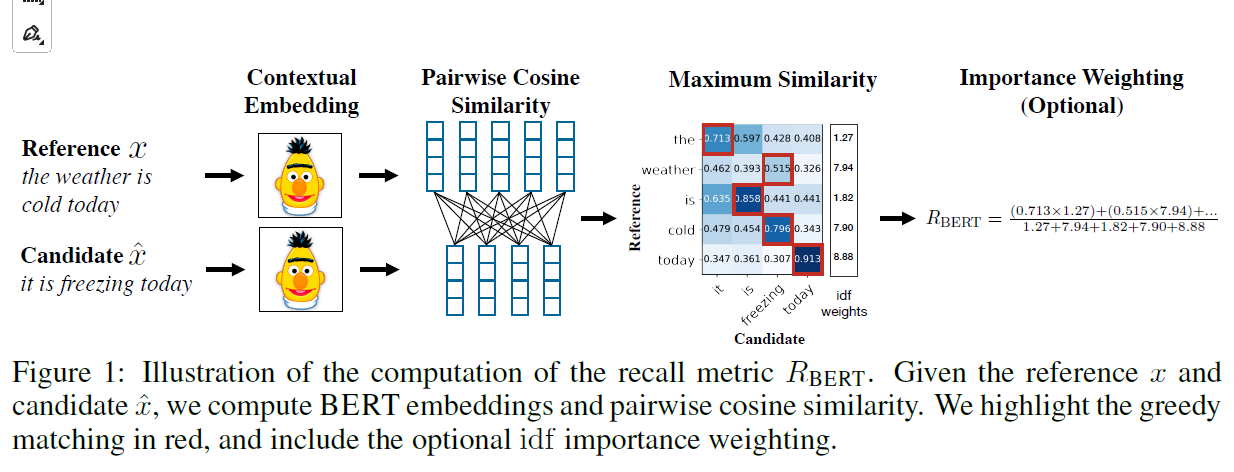

https://huggingface.co/spaces/evaluate-metric/bertscore

In [ ]:
pip install evaluate

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00


In [ ]:
from evaluate import load

In [ ]:
pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
bertscore = load("bertscore")


In [ ]:
predictions = ["cat sat on mat", "general kenobi"]
references = ["cat sat on table", "general kenobi"]
results = bertscore.compute(predictions=predictions, references=references, lang="en")

In [ ]:
print(results)

{'precision': [1.0, 1.0], 'recall': [1.0, 1.0], 'f1': [1.0, 1.0], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.44.2)'}


In [ ]:
predictions = ["drivers are not required", "general kenobi"]
references = ["drivers are required", "general kenobi"]
results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
print(results)

{'precision': [0.943096935749054, 1.0000001192092896], 'recall': [0.9781228303909302, 1.0000001192092896], 'f1': [0.9602906107902527, 1.0000001192092896], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.44.2)'}


In [ ]:
bertscore = load("bertscore")
predictions = ["hello world", "general kenobi"]
references = ["goodnight moon", "the sun is shining"]
results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
print(results)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'precision': [0.7899678945541382, 0.5584039688110352], 'recall': [0.7899678945541382, 0.5889028310775757], 'f1': [0.7899678349494934, 0.573248028755188], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.44.2)'}


На примере русского языка:

In [ ]:
predictions = ["Драйвера для установки комлекса не требуются", "general kenobi"]
references = ["Драйвера для установки комлекса требуются", "general kenobi"]
results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased", lang="ru")
print(results)

{'precision': [0.9862200617790222, 1.0], 'recall': [0.9981945753097534, 1.0], 'f1': [0.9921711683273315, 1.0], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.44.2)'}
